In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
df=pd.read_csv("wine_train.csv")

In [3]:
df

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [4]:
df['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

In [5]:
df['type'].value_counts()

white    4159
red      1338
Name: type, dtype: int64

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
## 딥러닝 기본에서는 target이 명목형인경우 dummy로 만들어주어야한다(원핫인코딩)

In [13]:
y_data=to_categorical(df['quality']-3)##0, 1, 2는 값이 없으므로 빼준다
y_data#target

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
df['type']=np.where(df['type']=='white', 1,0).astype('int')

In [35]:
X_data=df.iloc[:,2:]
X_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1
5493,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1
5494,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1
5495,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,1


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)
X_data_scaled

array([[0.14876033, 0.41      , 0.03614458, ..., 0.12359551, 0.31884058,
        1.        ],
       [0.41322314, 0.35333333, 0.08433735, ..., 0.20786517, 0.2173913 ,
        0.        ],
       [0.33884298, 0.08666667, 0.23493976, ..., 0.16853933, 0.42028986,
        1.        ],
       ...,
       [0.33057851, 0.04666667, 0.20481928, ..., 0.28089888, 0.47826087,
        1.        ],
       [0.23140496, 0.22      , 0.18674699, ..., 0.10674157, 0.36231884,
        1.        ],
       [0.26446281, 0.18      , 0.10240964, ..., 0.07865169, 0.24637681,
        1.        ]])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, 
                                                    test_size=0.1, 
                                                    shuffle=True, 
                                                    random_state=11)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4947, 12) (4947, 7)
(550, 12) (550, 7)


In [40]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [41]:

model = Sequential()##Layer 쌓을 수 있도록 객체를 생성 
model.add(Dense(128, activation='relu', input_dim=12))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))


In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc','mae'])
#이 모델로 설정을 하겠음.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 7)                 119       
                                                                 
Total params: 12,647
Trainable params: 12,647
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=2)
history #401번 돌림0.8997 -

Epoch 1/300
155/155 - 0s - loss: 0.8546 - acc: 0.6256 - mae: 0.1404 - 152ms/epoch - 983us/step
Epoch 2/300
155/155 - 0s - loss: 0.8575 - acc: 0.6317 - mae: 0.1396 - 156ms/epoch - 1ms/step
Epoch 3/300
155/155 - 0s - loss: 0.8563 - acc: 0.6289 - mae: 0.1404 - 164ms/epoch - 1ms/step
Epoch 4/300
155/155 - 0s - loss: 0.8545 - acc: 0.6370 - mae: 0.1394 - 188ms/epoch - 1ms/step
Epoch 5/300
155/155 - 0s - loss: 0.8493 - acc: 0.6315 - mae: 0.1395 - 146ms/epoch - 944us/step
Epoch 6/300
155/155 - 0s - loss: 0.8376 - acc: 0.6388 - mae: 0.1380 - 155ms/epoch - 997us/step
Epoch 7/300
155/155 - 0s - loss: 0.8471 - acc: 0.6333 - mae: 0.1383 - 162ms/epoch - 1ms/step
Epoch 8/300
155/155 - 0s - loss: 0.8417 - acc: 0.6315 - mae: 0.1380 - 178ms/epoch - 1ms/step
Epoch 9/300
155/155 - 0s - loss: 0.8396 - acc: 0.6384 - mae: 0.1376 - 156ms/epoch - 1ms/step
Epoch 10/300
155/155 - 0s - loss: 0.8321 - acc: 0.6450 - mae: 0.1369 - 168ms/epoch - 1ms/step
Epoch 11/300
155/155 - 0s - loss: 0.8301 - acc: 0.6416 - mae: 0

Epoch 88/300
155/155 - 0s - loss: 0.6237 - acc: 0.7459 - mae: 0.1042 - 154ms/epoch - 995us/step
Epoch 89/300
155/155 - 0s - loss: 0.6392 - acc: 0.7316 - mae: 0.1058 - 173ms/epoch - 1ms/step
Epoch 90/300
155/155 - 0s - loss: 0.6312 - acc: 0.7370 - mae: 0.1052 - 167ms/epoch - 1ms/step
Epoch 91/300
155/155 - 0s - loss: 0.6360 - acc: 0.7421 - mae: 0.1051 - 151ms/epoch - 976us/step
Epoch 92/300
155/155 - 0s - loss: 0.6252 - acc: 0.7374 - mae: 0.1045 - 181ms/epoch - 1ms/step
Epoch 93/300
155/155 - 0s - loss: 0.6236 - acc: 0.7445 - mae: 0.1038 - 160ms/epoch - 1ms/step
Epoch 94/300
155/155 - 0s - loss: 0.6126 - acc: 0.7445 - mae: 0.1024 - 154ms/epoch - 995us/step
Epoch 95/300
155/155 - 0s - loss: 0.6172 - acc: 0.7477 - mae: 0.1029 - 169ms/epoch - 1ms/step
Epoch 96/300
155/155 - 0s - loss: 0.6109 - acc: 0.7544 - mae: 0.1018 - 155ms/epoch - 1000us/step
Epoch 97/300
155/155 - 0s - loss: 0.6071 - acc: 0.7550 - mae: 0.1015 - 167ms/epoch - 1ms/step
Epoch 98/300
155/155 - 0s - loss: 0.6098 - acc: 0.7

Epoch 175/300
155/155 - 0s - loss: 0.4608 - acc: 0.8140 - mae: 0.0775 - 247ms/epoch - 2ms/step
Epoch 176/300
155/155 - 0s - loss: 0.4561 - acc: 0.8142 - mae: 0.0763 - 209ms/epoch - 1ms/step
Epoch 177/300
155/155 - 0s - loss: 0.4618 - acc: 0.8183 - mae: 0.0768 - 220ms/epoch - 1ms/step
Epoch 178/300
155/155 - 0s - loss: 0.4453 - acc: 0.8243 - mae: 0.0753 - 206ms/epoch - 1ms/step
Epoch 179/300
155/155 - 0s - loss: 0.4355 - acc: 0.8304 - mae: 0.0741 - 194ms/epoch - 1ms/step
Epoch 180/300
155/155 - 0s - loss: 0.4507 - acc: 0.8209 - mae: 0.0755 - 194ms/epoch - 1ms/step
Epoch 181/300
155/155 - 0s - loss: 0.4345 - acc: 0.8262 - mae: 0.0739 - 208ms/epoch - 1ms/step
Epoch 182/300
155/155 - 0s - loss: 0.4258 - acc: 0.8328 - mae: 0.0727 - 192ms/epoch - 1ms/step
Epoch 183/300
155/155 - 0s - loss: 0.4421 - acc: 0.8260 - mae: 0.0743 - 185ms/epoch - 1ms/step
Epoch 184/300
155/155 - 0s - loss: 0.4449 - acc: 0.8266 - mae: 0.0753 - 184ms/epoch - 1ms/step
Epoch 185/300
155/155 - 0s - loss: 0.4431 - acc: 0

Epoch 262/300
155/155 - 0s - loss: 0.3160 - acc: 0.8757 - mae: 0.0546 - 217ms/epoch - 1ms/step
Epoch 263/300
155/155 - 0s - loss: 0.3208 - acc: 0.8763 - mae: 0.0551 - 266ms/epoch - 2ms/step
Epoch 264/300
155/155 - 0s - loss: 0.3193 - acc: 0.8749 - mae: 0.0543 - 225ms/epoch - 1ms/step
Epoch 265/300
155/155 - 0s - loss: 0.3272 - acc: 0.8771 - mae: 0.0551 - 240ms/epoch - 2ms/step
Epoch 266/300
155/155 - 0s - loss: 0.3294 - acc: 0.8668 - mae: 0.0560 - 234ms/epoch - 2ms/step
Epoch 267/300
155/155 - 0s - loss: 0.3271 - acc: 0.8759 - mae: 0.0549 - 264ms/epoch - 2ms/step
Epoch 268/300
155/155 - 0s - loss: 0.3187 - acc: 0.8727 - mae: 0.0547 - 356ms/epoch - 2ms/step
Epoch 269/300
155/155 - 0s - loss: 0.3058 - acc: 0.8848 - mae: 0.0527 - 209ms/epoch - 1ms/step
Epoch 270/300
155/155 - 0s - loss: 0.3017 - acc: 0.8884 - mae: 0.0519 - 201ms/epoch - 1ms/step
Epoch 271/300
155/155 - 0s - loss: 0.3013 - acc: 0.8846 - mae: 0.0520 - 217ms/epoch - 1ms/step
Epoch 272/300
155/155 - 0s - loss: 0.2999 - acc: 0

In [ ]:
#Train: 55/155 - 0s - loss: 0.2649 - acc: 0.8997 - mae: 0.0461 - 232ms/epoch - 1ms/step
#Test: 18/18 - 0s 1ms/step - loss: 2.2088 - acc: 0.5873 - mae: 0.1233

## loss : train < test
## acc : train > test
## mae : train < test

In [56]:
eva_test=model.evaluate(X_test, y_test)
eva_test # 0.5872727036476135,... 오버피팅됨


18/18 [==============================] - 0s 1ms/step - loss: 2.2088 - acc: 0.5873 - mae: 0.1233


[2.2088444232940674, 0.5872727036476135, 0.12331373989582062]

In [57]:
pred_test = model.predict(X_test)
pred_test[:5]

array([[2.42000320e-15, 2.08494612e-13, 4.00177633e-08, 7.63781660e-04,
        9.99236226e-01, 1.73419423e-09, 2.06529496e-13],
       [2.18948735e-05, 1.21160038e-03, 4.20299917e-01, 5.68374217e-01,
        1.00496477e-02, 4.26640327e-05, 5.96203353e-09],
       [4.15452811e-11, 5.66837341e-11, 3.92527085e-07, 9.99987245e-01,
        1.20921331e-05, 1.10001146e-07, 2.20970065e-07],
       [1.64555502e-03, 5.22657356e-05, 3.17258477e-01, 6.80492938e-01,
        5.50782308e-04, 6.37128059e-11, 4.69987993e-10],
       [1.23287639e-11, 1.25649981e-02, 1.41076893e-01, 8.45407128e-01,
        7.78750516e-04, 1.72225846e-04, 6.55904357e-16]], dtype=float32)

In [60]:
pred_test_arg=np.argmax(pred_test[0])
pred_test_arg+3

7

In [63]:
y_test[0][5:]

array([0., 0.], dtype=float32)

In [68]:
Y_pred_test=np.argmax(pred_test, axis=-1)+3

In [69]:
Y_pred_test

array([7, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 7,
       5, 6, 7, 5, 6, 7, 5, 6, 7, 7, 6, 6, 5, 6, 6, 7, 5, 7, 5, 5, 6, 6,
       7, 5, 7, 6, 7, 6, 7, 6, 7, 6, 5, 7, 5, 6, 6, 5, 6, 7, 6, 6, 5, 6,
       6, 5, 7, 5, 6, 5, 5, 6, 6, 7, 6, 5, 6, 7, 5, 6, 5, 7, 6, 5, 6, 5,
       6, 5, 5, 6, 5, 6, 5, 5, 5, 7, 6, 5, 4, 6, 6, 7, 6, 6, 7, 7, 5, 7,
       5, 7, 5, 5, 5, 5, 7, 5, 6, 4, 4, 7, 6, 6, 5, 5, 5, 5, 7, 6, 6, 5,
       7, 7, 6, 6, 6, 7, 4, 5, 5, 6, 6, 7, 6, 5, 6, 5, 6, 6, 6, 7, 7, 5,
       6, 5, 6, 5, 6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 7, 7, 6, 4, 5, 6, 7, 6,
       6, 6, 7, 5, 5, 7, 6, 6, 6, 5, 5, 5, 7, 6, 7, 7, 6, 5, 7, 5, 6, 7,
       6, 6, 5, 7, 5, 6, 6, 6, 5, 7, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 7,
       5, 7, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 4, 6, 5, 7, 5, 5, 5, 7, 5,
       5, 6, 7, 5, 6, 6, 5, 7, 5, 6, 5, 7, 7, 7, 5, 5, 7, 5, 5, 4, 6, 5,
       3, 7, 6, 7, 6, 6, 7, 6, 7, 5, 6, 7, 6, 8, 5, 7, 5, 5, 5, 5, 7, 7,
       6, 6, 7, 6, 7, 6, 7, 6, 7, 6, 6, 5, 7, 6, 5,

In [77]:
y_test1=np.argmax(y_test, axis=-1)+3 #1차원 배열로만들어주어야함

In [73]:
from sklearn.metrics import r2_score, confusion_matrix
R2 = r2_score(y_test, pred_test, multioutput='variance_weighted')
R2

0.013917434514711101

In [86]:
conf_matrix= confusion_matrix(y_test1, Y_pred_test)
conf_matrix

array([[  0,   0,   1,   1,   0,   0],
       [  1,   5,   9,   1,   1,   0],
       [  0,   4, 121,  38,  14,   0],
       [  0,   1,  56, 135,  48,   1],
       [  0,   0,  12,  26,  60,   3],
       [  0,   0,   0,   3,   7,   2]], dtype=int64)

### 시각화

In [ ]:

label=['3', '4', '5', '6', '7', '8', '9'] # 라벨 설정
plot = plot_confusion_matrix(clf, # 분류 모델
                             X_test_scaled, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Blue, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

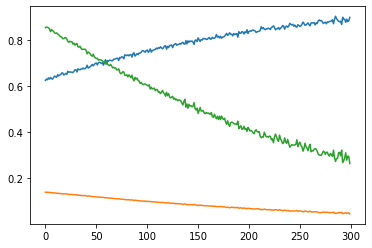

In [87]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['mae'])
plt.plot(history.history['loss'])
plt.show()

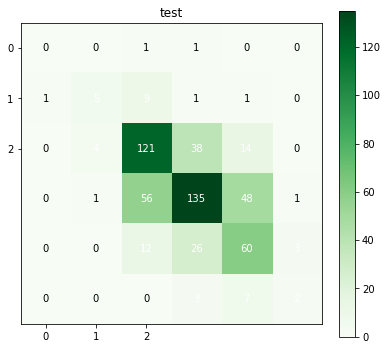

In [93]:
title = 'test'
cmap=plt.cm.Greens
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)  # , cmap=plt.cm.Greens
plt.title(title, size=12)
plt.colorbar(fraction=0.05, pad=0.05)
tick_marks = np.arange(3, 3)
plt.xticks(np.arange(3), ('0', '1', '2'))
plt.yticks(np.arange(3), ('0', '1', '2'))


fmt = 'd' 
thresh = 1
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 ha="center", va="center", color="white" if conf_matrix[i, j] > thresh else "black")  #horizontalalignment